In [1]:
import pandas as pd
import fastf1 as ff1
import matplotlib.pyplot as plt
import seaborn as sns

# read csvs
qualLaps = pd.read_csv('all_qualLaps.csv')
qualResults = pd.read_csv('all_qualResults.csv')
qualStatus = pd.read_csv('all_qualStatus.csv')
qualTrackStatus = pd.read_csv('all_qualTrackStatus.csv')
qualWeather = pd.read_csv('all_qualWeather.csv')
raceLaps = pd.read_csv('all_raceLaps.csv')
raceResults = pd.read_csv('all_raceResults.csv')
raceStatus = pd.read_csv('all_raceStatus.csv')
raceTrackStatus = pd.read_csv('all_raceTrackStatus.csv')
raceWeather = pd.read_csv('all_raceWeather.csv')

C:\Users\alec\AppData\Local\Temp\ipykernel_1388\1798382763.py:12: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  raceLaps = pd.read_csv('all_raceLaps.csv')


In [2]:
# List of DataFrames and their names
dataframes = {
    "qualLaps": qualLaps,
    "qualResults": qualResults,
    "qualStatus": qualStatus,
    "qualTrackStatus": qualTrackStatus,
    "qualWeather": qualWeather,
    "raceLaps": raceLaps,
    "raceResults": raceResults,
    "raceStatus": raceStatus,
    "raceTrackStatus": raceTrackStatus,
    "raceWeather": raceWeather
}

# Print .info() for each DataFrame
for name, df in dataframes.items():
    print(f"Info for DataFrame: {name}")
    print("-" * 40)
    df.info()
    print("\n")

Info for DataFrame: qualLaps
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15790 entries, 0 to 15789
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                15790 non-null  object 
 1   Driver              15790 non-null  object 
 2   DriverNumber        15790 non-null  int64  
 3   LapTime             10712 non-null  object 
 4   LapNumber           15790 non-null  float64
 5   Stint               15768 non-null  float64
 6   PitOutTime          4948 non-null   object 
 7   PitInTime           4948 non-null   object 
 8   Sector1Time         15380 non-null  object 
 9   Sector2Time         15702 non-null  object 
 10  Sector3Time         11366 non-null  object 
 11  Sector1SessionTime  15380 non-null  object 
 12  Sector2SessionTime  15702 non-null  object 
 13  Sector3SessionTime  11366 non-null  object 
 14  SpeedI1             15698 non-nu

In [3]:
qualLaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15790 entries, 0 to 15789
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                15790 non-null  object 
 1   Driver              15790 non-null  object 
 2   DriverNumber        15790 non-null  int64  
 3   LapTime             10712 non-null  object 
 4   LapNumber           15790 non-null  float64
 5   Stint               15768 non-null  float64
 6   PitOutTime          4948 non-null   object 
 7   PitInTime           4948 non-null   object 
 8   Sector1Time         15380 non-null  object 
 9   Sector2Time         15702 non-null  object 
 10  Sector3Time         11366 non-null  object 
 11  Sector1SessionTime  15380 non-null  object 
 12  Sector2SessionTime  15702 non-null  object 
 13  Sector3SessionTime  11366 non-null  object 
 14  SpeedI1             15698 non-null  float64
 15  SpeedI2             15702 non-null  float64
 16  Spee

In [4]:
# # 1. Distribution of LapTime
# plt.figure(figsize=(10, 6))
# sns.histplot(qualLaps['LapTime'].dropna(), kde=True)
# plt.title('Distribution of Lap Times')
# plt.xlabel('Lap Time (in seconds)')
# plt.ylabel('Frequency')
# plt.show()

# # 3. Average LapTime per Driver
# plt.figure(figsize=(10, 6))
# sns.barplot(y='Driver', x='LapTime', data=qualLaps, estimator=sum, ci=None, order=qualLaps.groupby('Driver')['LapTime'].mean().sort_values().index)
# plt.title('Average Lap Time per Driver')
# plt.xlabel('Average Lap Time (in seconds)')
# plt.show()



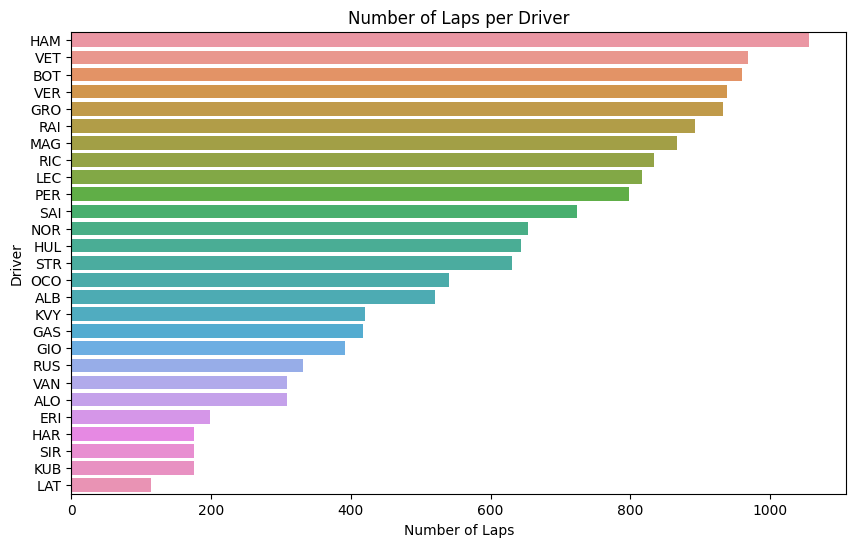

In [5]:
# 2. Number of laps per Driver
plt.figure(figsize=(10, 6))
sns.countplot(y=qualLaps['Driver'], order=qualLaps['Driver'].value_counts().index)
plt.title('Number of Laps per Driver')
plt.xlabel('Number of Laps')
plt.show()

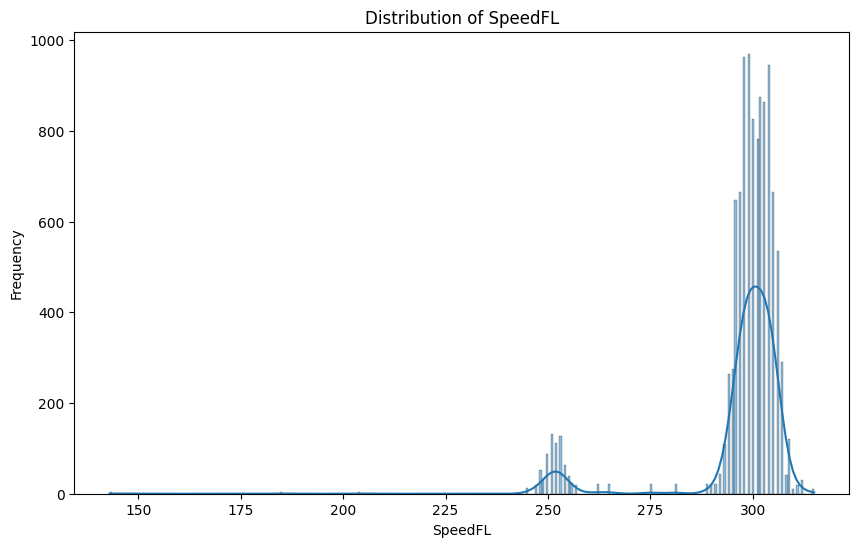

In [6]:
# 4. Distribution of speeds (SpeedFL)
plt.figure(figsize=(10, 6))
sns.histplot(qualLaps['SpeedFL'].dropna(), kde=True)
plt.title('Distribution of SpeedFL')
plt.xlabel('SpeedFL')
plt.ylabel('Frequency')
plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_1388\3341301070.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Compound', y='SpeedFL', data=qualLaps, ci=None)


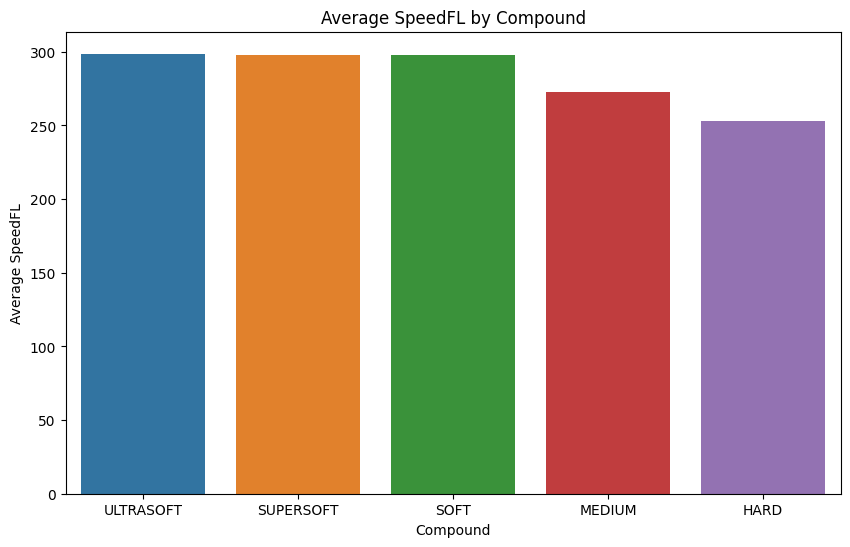

In [7]:
#Average SpeedFL by Compound
plt.figure(figsize=(10, 6))
sns.barplot(x='Compound', y='SpeedFL', data=qualLaps, ci=None)
plt.title('Average SpeedFL by Compound')
plt.ylabel('Average SpeedFL')
plt.show()

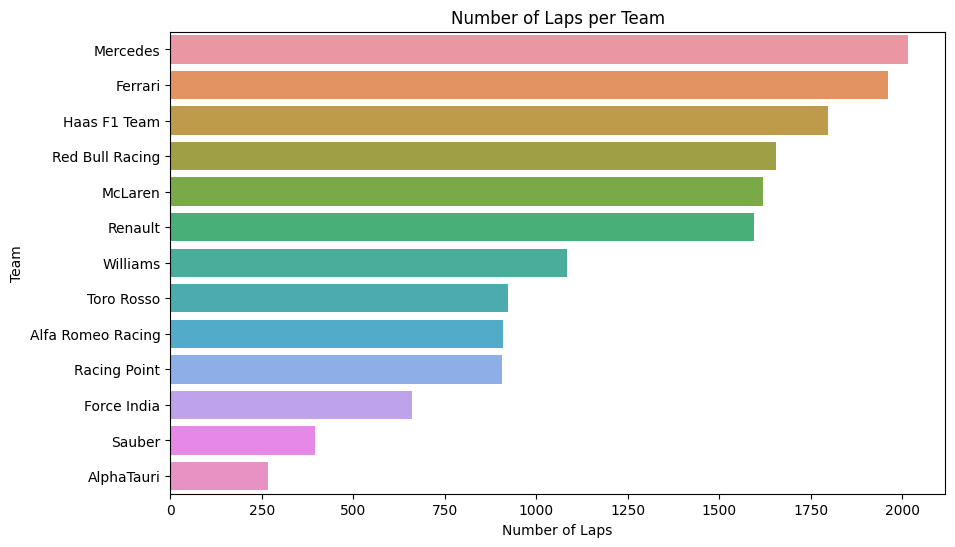

In [8]:
#Count of laps by Team
plt.figure(figsize=(10, 6))
sns.countplot(y=qualLaps['Team'], order=qualLaps['Team'].value_counts().index)
plt.title('Number of Laps per Team')
plt.xlabel('Number of Laps')
plt.show()

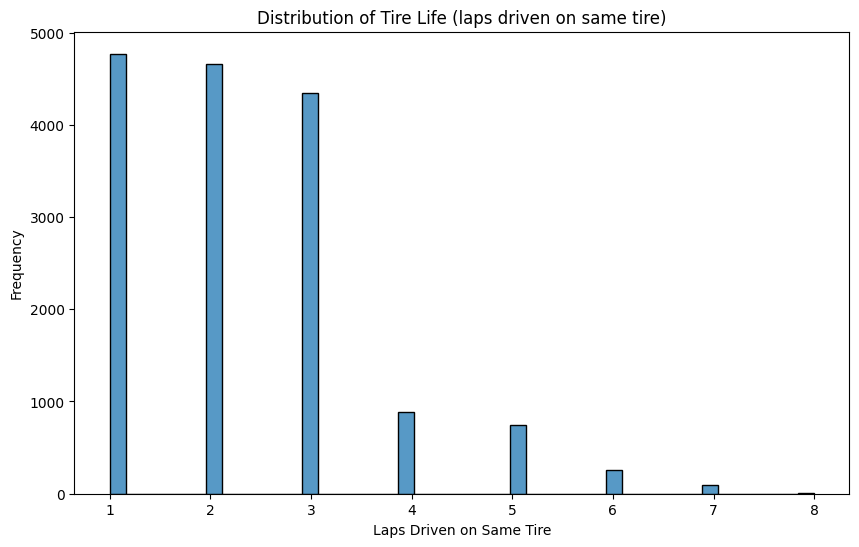

In [9]:
#Distribution of TyreLife
plt.figure(figsize=(10, 6))
sns.histplot(qualLaps['TyreLife'].dropna(), kde=False)
plt.title('Distribution of Tire Life (laps driven on same tire)')
plt.xlabel('Laps Driven on Same Tire')
plt.ylabel('Frequency')
plt.show()


In [10]:
qualLaps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,raceId
0,0 days 00:08:49.865000,HAM,44,0 days 00:01:47.929000,1.0,1.0,0 days 00:07:06.138000,NaN,0 days 00:00:42.222000,0 days 00:00:27.261000,...,Mercedes,0 days 00:07:06.138000,2018-03-24 06:03:06.303,1,NaN,False,NaN,False,False,2018r1q
1,0 days 00:10:13.667000,HAM,44,0 days 00:01:23.802000,2.0,1.0,NaN,NaN,0 days 00:00:27.667000,0 days 00:00:22.884000,...,Mercedes,0 days 00:08:49.865000,2018-03-24 06:04:50.030,1,NaN,False,NaN,False,True,2018r1q
2,0 days 00:12:06.203000,HAM,44,0 days 00:01:52.536000,3.0,1.0,NaN,NaN,0 days 00:00:42.357000,0 days 00:00:33.017000,...,Mercedes,0 days 00:10:13.667000,2018-03-24 06:06:13.832,1,NaN,False,NaN,False,True,2018r1q
3,0 days 00:13:29.466000,HAM,44,0 days 00:01:23.263000,4.0,1.0,NaN,NaN,0 days 00:00:27.410000,0 days 00:00:22.811000,...,Mercedes,0 days 00:12:06.203000,2018-03-24 06:08:06.368,1,NaN,False,NaN,False,True,2018r1q
4,0 days 00:15:28.217000,HAM,44,0 days 00:01:58.751000,5.0,1.0,NaN,NaN,0 days 00:00:35.598000,0 days 00:00:38.396000,...,Mercedes,0 days 00:13:29.466000,2018-03-24 06:09:29.631,1,NaN,False,NaN,False,True,2018r1q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,0 days 00:25:05.748000,MAG,20,0 days 00:01:17.932000,2.0,1.0,NaN,NaN,0 days 00:00:28.034000,0 days 00:00:21.522000,...,Haas F1 Team,0 days 00:23:47.816000,2020-09-12 13:08:47.836,1,NaN,False,NaN,False,True,2020r21q
15786,0 days 00:29:41.510000,MAG,20,NaN,3.0,1.0,NaN,0 days 00:26:39.172000,0 days 00:00:35.043000,0 days 00:00:28.910000,...,Haas F1 Team,0 days 00:25:05.748000,2020-09-12 13:10:05.768,1,NaN,False,NaN,False,False,2020r21q
15787,0 days 00:31:40.713000,MAG,20,0 days 00:01:59.203000,4.0,2.0,0 days 00:29:44.153000,NaN,0 days 00:00:48.942000,0 days 00:00:30.733000,...,Haas F1 Team,0 days 00:29:41.510000,2020-09-12 13:14:41.530,1,NaN,False,NaN,False,False,2020r21q
15788,0 days 00:32:58.061000,MAG,20,0 days 00:01:17.348000,5.0,2.0,NaN,NaN,0 days 00:00:27.797000,0 days 00:00:21.379000,...,Haas F1 Team,0 days 00:31:40.713000,2020-09-12 13:16:40.733,1,NaN,False,NaN,False,True,2020r21q


In [30]:
unique_team_count = qualLaps['raceId'].nunique()
print(unique_team_count)


58


In [31]:
unique_raceId_count = qualLaps['Team'].nunique()
print(unique_raceId_count)


13


In [28]:
#Total Amount of Pit Stops
pit_stops = qualLaps.groupby(['Driver', 'raceId'])['Stint'].max().reset_index()
# I'm calculating pit stop count using the total number of stints a driver has. 
# Drivers start with 1 stint when they drive out to start the race. max() shows the total stints a driver had in a race
pit_stops['Stint'] = pit_stops['Stint'] - 1 
total_pit_stops = pit_stops['Stint'].sum()
print(f"Total Pit Stops: {total_pit_stops}")

Total Pit Stops: 3788.0


C:\Users\alec\AppData\Local\Temp\ipykernel_1388\917654794.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stint', y='Driver', data=avg_pit_stops_by_driver.sort_values('Stint', ascending=False), ci=None)


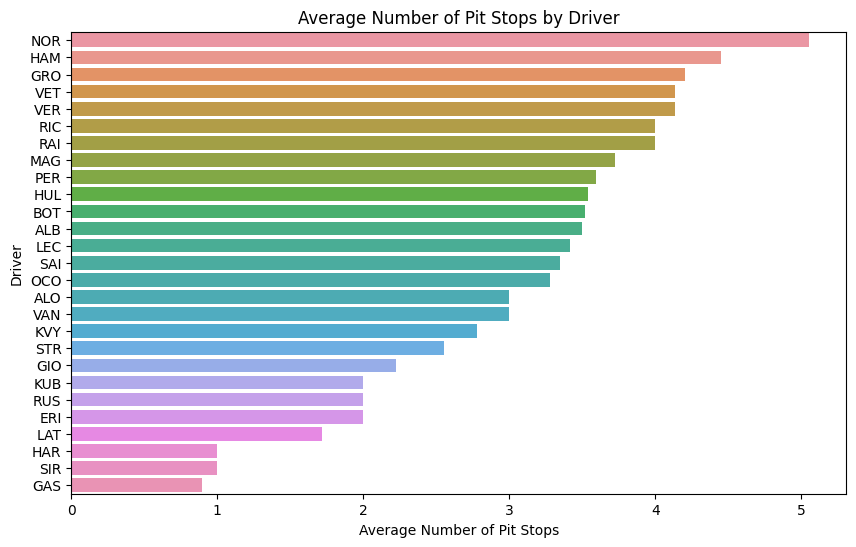

In [26]:
# 2. Average Pit Stops by Drivers
avg_pit_stops_by_driver = pit_stops.groupby('Driver')['Stint'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Stint', y='Driver', data=avg_pit_stops_by_driver.sort_values('Stint', ascending=False), ci=None)
plt.title('Average Number of Pit Stops by Driver')
plt.xlabel('Average Number of Pit Stops')
plt.ylabel('Driver')
plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_1388\1726986630.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stint', y='Team', data=avg_pit_stops_by_team.sort_values('Stint', ascending=False), ci=None)


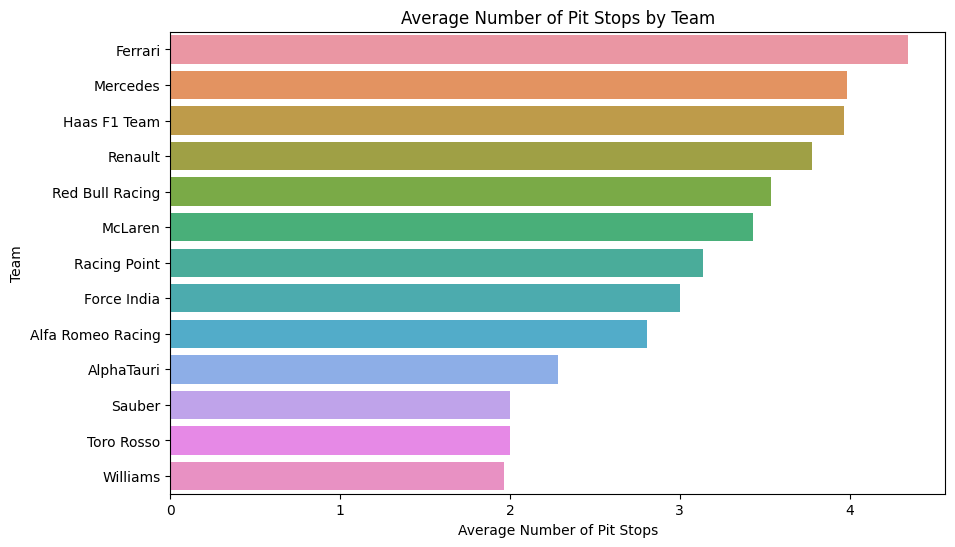

In [27]:
# 3. Average Pit Stops by Teams
pit_stops_with_team = pit_stops.merge(qualLaps[['Driver', 'raceId', 'Team']], on=['Driver', 'raceId'], how='left').drop_duplicates()
avg_pit_stops_by_team = pit_stops_with_team.groupby('Team')['Stint'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Stint', y='Team', data=avg_pit_stops_by_team.sort_values('Stint', ascending=False), ci=None)
plt.title('Average Number of Pit Stops by Team')
plt.xlabel('Average Number of Pit Stops')
plt.ylabel('Team')
plt.show()